In [12]:
#pip install beautifulsoup4 requests

In [13]:
#pip install selenium

In [14]:
#pip install webdriver-manager

In [15]:
#pip install TextBlob

In [16]:
'''from selenium import webdriver
from textblob import TextBlob
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time
import json

# Set up the Chrome WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the URL for FitBit reviews on Drugs.com
url = 'https://community.fitbit.com/t5/Product-Feedback/idb-p/features/status-key/modreview'
driver.get(url)

# Pause to let the page load
time.sleep(5)

# Initialize list to store reviews
fitbit_reviews = []

# Loop through multiple pages (change range if you want more pages)
for page_num in range(1, 31):  # Iterate through 10 pages
    print(f"Scraping page {page_num}")
    
    # Find all review containers on the current page
    reviews = driver.find_elements(By.CSS_SELECTOR, "div.lia-message-view-wrapper")  # Ensure this is the correct selector
    # Extract and store the review text
    for review in reviews:
        try:
            # Update the selector based on your inspection
            comment = review.find_element(By.CSS_SELECTOR, ".lia-truncate-with-message-link").text.replace("... View more", "").strip()
            date = review.find_element(By.XPATH, '//*[@id="messageview2"]/div[2]/div/div[2]/div/div/div[2]/span[3]/span[4]/span[1]').text.strip()
            analysis = TextBlob(comment)
            if analysis.sentiment.polarity > 0:
                sentiment = 'Positive'
            elif analysis.sentiment.polarity < 0:
                sentiment = 'Negative'
            else:
                sentiment = 'Neutral'

            # print(sentiment)
            # Append the data to the list
            if comment:
                fitbit_reviews.append({
                    'Date': date,
                    'Comment': comment,
                    'Sentiment': sentiment
                })
                print({
                    'Date': date,
                    'Comment': comment,
                    'Sentiment': sentiment
                })

            # if comment:
                # fitbit_reviews.append(comment)
        except Exception as e:
            print(f"Error extracting comment: {e}")
            continue
    
    # Check if there are any reviews scraped for this page
    print(f"Reviews on page {page_num}: {len(fitbit_reviews)}")
    
    # Click the "Next" button to go to the next page if it exists
    try:
        next_button = driver.find_element(By.LINK_TEXT, "Next")
        next_button.click()
        time.sleep(5)  # Pause to let the next page load
    except Exception as e:
        print(f"No more pages after page {page_num}: {e}")
        break
        
print(fitbit_reviews)

# Close the browser
driver.quit()

# Save the reviews to a JSON file
with open('fitbit_reviews_selenium.json', 'w', encoding='utf-8') as json_file:
    json.dump(fitbit_reviews, json_file, ensure_ascii=False, indent=4)  # indent for pretty printing'''


'from selenium import webdriver\nfrom textblob import TextBlob\nfrom selenium.webdriver.chrome.service import Service\nfrom webdriver_manager.chrome import ChromeDriverManager\nfrom selenium.webdriver.common.by import By\nimport time\nimport json\n\n# Set up the Chrome WebDriver\ndriver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))\n\n# Open the URL for FitBit reviews on Drugs.com\nurl = \'https://community.fitbit.com/t5/Product-Feedback/idb-p/features/status-key/modreview\'\ndriver.get(url)\n\n# Pause to let the page load\ntime.sleep(5)\n\n# Initialize list to store reviews\nfitbit_reviews = []\n\n# Loop through multiple pages (change range if you want more pages)\nfor page_num in range(1, 31):  # Iterate through 10 pages\n    print(f"Scraping page {page_num}")\n    \n    # Find all review containers on the current page\n    reviews = driver.find_elements(By.CSS_SELECTOR, "div.lia-message-view-wrapper")  # Ensure this is the correct selector\n    # Extract and s

In [17]:
'''with open('fitbit_reviews_selenium.txt', 'w') as f:
    for review in fitbit_reviews[:500]:  # Limit to 500 reviews
        # Extract the review text using the correct key
        review_text = review.get('review_text', '')  # Default to empty string if key is missing
        f.write(review_text + '\n')

print(f"Total reviews extracted: {len(fitbit_reviews)}")'''


'with open(\'fitbit_reviews_selenium.txt\', \'w\') as f:\n    for review in fitbit_reviews[:500]:  # Limit to 500 reviews\n        # Extract the review text using the correct key\n        review_text = review.get(\'review_text\', \'\')  # Default to empty string if key is missing\n        f.write(review_text + \'\n\')\n\nprint(f"Total reviews extracted: {len(fitbit_reviews)}")'

In [18]:
#positive_clusters

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import json


# Load the reviews JSON file directly from the given path
file_path = '/Users/vinitbhanushali/Desktop/Rutgers-Coursework/Capstone_Project/fitbit_reviews_new.json'

with open(file_path, 'r', encoding='utf-8') as f:
    fitbit_reviews = json.load(f)

# Now you can work with the 'fitbit_reviews' variable


# Convert JSON to DataFrame
df = pd.DataFrame(fitbit_reviews)

# Segregate comments by sentiment
positive_comments = df[df['Sentiment'] == 'Positive']['Comment'].tolist()
negative_comments = df[df['Sentiment'] == 'Negative']['Comment'].tolist()


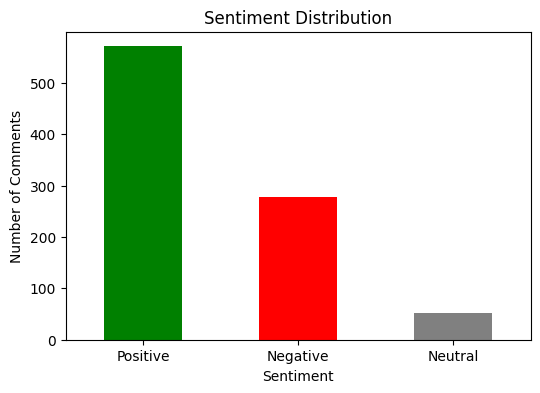

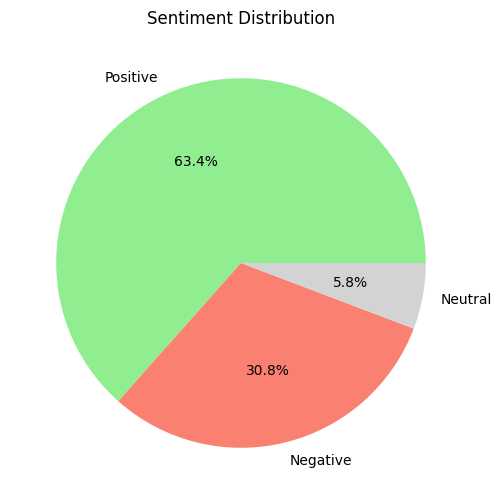

In [23]:
# Count comments by sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Bar Chart
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'lightgray'])
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide y-label for pie chart
plt.show()


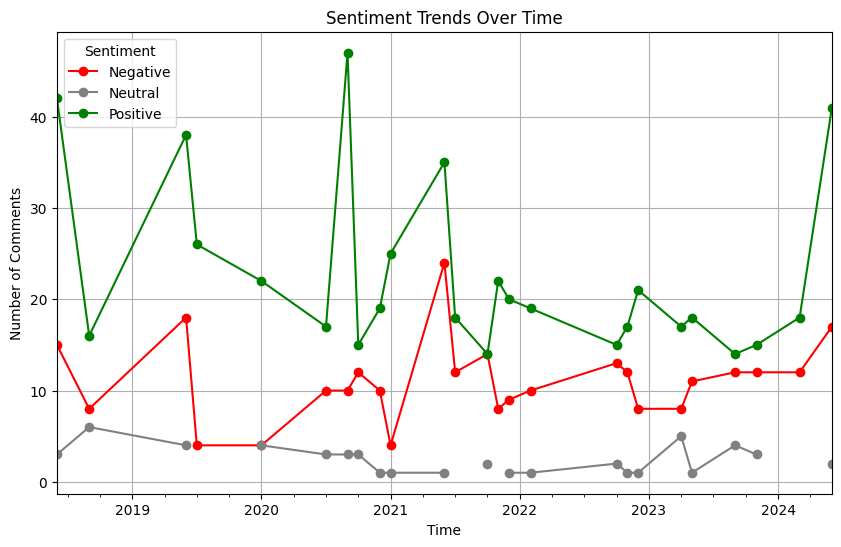

In [21]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by sentiment and month
sentiment_trends = df.groupby([df['Date'].dt.to_period('M'), 'Sentiment']).size().unstack()

# Define colors for the line chart, matching the bar and pie chart
colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'gray'
}

# Line Chart
ax = sentiment_trends.plot(figsize=(10, 6), marker='o', color=[colors.get(sentiment, 'black') for sentiment in sentiment_trends.columns])
plt.title("Sentiment Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Comments")
plt.legend(title="Sentiment", loc='upper left')
plt.grid()
plt.show()


In [22]:
from wordcloud import WordCloud

def generate_word_cloud(comments, title):
    combined_text = " ".join(comments)
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(combined_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

generate_word_cloud(positive_comments, "Positive Comments Word Cloud")
generate_word_cloud(negative_comments, "Negative Comments Word Cloud")


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from nltk.corpus import stopwords
import re
from collections import Counter

# Download stopwords if not already done
import nltk
nltk.download('stopwords')

# Define the stopword list
stop_words = set(stopwords.words('english'))

# Function to count top words in clusters while skipping stopwords
def count_top_words(clustered_comments, top_n=5):
    word_counts = {}
    for cluster_name, comments in clustered_comments.items():
        # Combine all comments in the cluster into a single text
        combined_text = " ".join(comments)
        # Tokenize and count words
        words = re.findall(r'\b\w+\b', combined_text.lower())  # Extract words using regex
        filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
        word_count = Counter(filtered_words)
        # Get the top_n most common words
        word_counts[cluster_name] = word_count.most_common(top_n)
    return word_counts

# Get word counts for positive, negative, and neutral clusters
positive_word_counts = count_top_words(positive_clusters_named, top_n=5)
negative_word_counts = count_top_words(negative_clusters_named, top_n=5)

# Output the word counts for each cluster
print("Top words in Positive Clusters:")
for cluster_name, words in positive_word_counts.items():
    print(f"Cluster '{cluster_name}': {words}")

print("\nTop words in Negative Clusters:")
for cluster_name, words in negative_word_counts.items():
    print(f"Cluster '{cluster_name}': {words}")


Top words in Positive Clusters:
Cluster 'sleep score heart rate data': [('sleep', 123), ('would', 53), ('moderator', 49), ('edit', 49), ('time', 47)]
Cluster 'fitbit app charge like watch': [('fitbit', 189), ('would', 180), ('app', 111), ('edit', 110), ('moderator', 104)]
Cluster 'subject edit clarified moderator label': [('edit', 229), ('moderator', 226), ('subject', 215), ('clarified', 199), ('would', 147)]

Top words in Negative Clusters:
Cluster 'exercise notifications subject moderator clarified': [('exercise', 29), ('moderator', 19), ('edit', 19), ('subject', 19), ('clarified', 18)]
Cluster 'edit moderator subject clarified updated': [('edit', 121), ('moderator', 119), ('subject', 116), ('clarified', 112), ('updated', 68)]
Cluster 'fitbit like subject edit moderator': [('fitbit', 84), ('edit', 81), ('moderator', 80), ('subject', 78), ('clarified', 73)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinitbhanushali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [137]:
'''import matplotlib.pyplot as plt

# Function to create bar charts for word counts
def visualize_top_words(word_counts, title):
    for cluster_name, words in word_counts.items():
        # Unpack words and their counts
        labels, counts = zip(*words)
        plt.figure(figsize=(8, 5))
        plt.bar(labels, counts, color='skyblue')
        plt.title(f"{title} - Cluster: {cluster_name}", fontsize=14)
        plt.xlabel("Words", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Visualize top words in positive and negative clusters
visualize_top_words(positive_word_counts, "Positive Comments")
visualize_top_words(negative_word_counts, "Negative Comments")
'''

'import matplotlib.pyplot as plt\n\n# Function to create bar charts for word counts\ndef visualize_top_words(word_counts, title):\n    for cluster_name, words in word_counts.items():\n        # Unpack words and their counts\n        labels, counts = zip(*words)\n        plt.figure(figsize=(8, 5))\n        plt.bar(labels, counts, color=\'skyblue\')\n        plt.title(f"{title} - Cluster: {cluster_name}", fontsize=14)\n        plt.xlabel("Words", fontsize=12)\n        plt.ylabel("Frequency", fontsize=12)\n        plt.xticks(rotation=45)\n        plt.tight_layout()\n        plt.show()\n\n# Visualize top words in positive and negative clusters\nvisualize_top_words(positive_word_counts, "Positive Comments")\nvisualize_top_words(negative_word_counts, "Negative Comments")\n'

In [147]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preprocess comments
def preprocess_text(comments):
    return [re.findall(r'\b\w+\b', comment.lower()) for comment in comments]

positive_texts = preprocess_text(positive_comments)
negative_texts = preprocess_text(negative_comments)

# Create dictionary and corpus
dictionary = Dictionary(positive_texts)
corpus = [dictionary.doc2bow(text) for text in positive_texts]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42)

# Visualize topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=89836) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=89836) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=89836) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=89836) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=89836) is multi-threaded, use of fork() ma

In [151]:
# Identify extremely long or short comments
df['Comment_Length'] = df['Comment'].apply(len)
outliers = df[(df['Comment_Length'] > df['Comment_Length'].quantile(0.95)) | 
              (df['Comment_Length'] < df['Comment_Length'].quantile(0.05))]

print("Outlier Comments:")
print(outliers[['Comment', 'Sentiment']])


Outlier Comments:
                                               Comment Sentiment
40                Include a snore report with sense 2.   Neutral
43   Bring back the solid green icons and fanfare o...  Positive
52   The app should have a way to set Water drinkin...  Negative
53   I just got home yesterday from a driving 6 hou...  Positive
78   Add WiFi option to Sense 2.   Moderator Edit: ...  Negative
..                                                 ...       ...
867  That I go to either extreme, working out pushi...  Positive
870  vision is an important component of a full and...  Positive
872  I would like to see in a future Versa or an up...  Positive
877  Fitbit's dashboard is second to none, in my op...  Positive
887  It would be great to have a program geared for...  Positive

[90 rows x 2 columns]


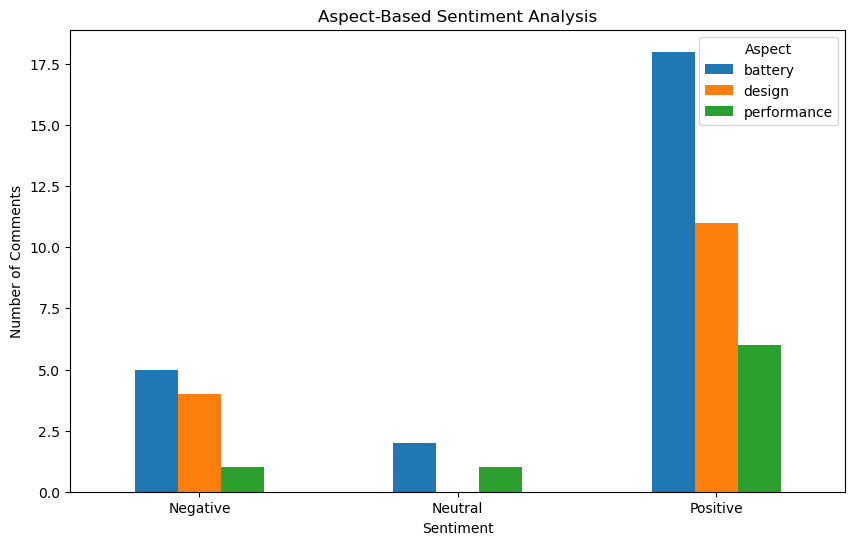

In [153]:
# Define aspects to analyze
aspects = ['battery', 'design', 'performance']

# Analyze each aspect
aspect_sentiments = {}
for aspect in aspects:
    aspect_comments = df[df['Comment'].str.contains(aspect, case=False, na=False)]
    aspect_sentiments[aspect] = aspect_comments['Sentiment'].value_counts()

# Plot aspect sentiment analysis
aspect_df = pd.DataFrame(aspect_sentiments).fillna(0)
aspect_df.plot(kind='bar', figsize=(10, 6))
plt.title("Aspect-Based Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.legend(title="Aspect")
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import json
import matplotlib.pyplot as plt


# Load the reviews JSON file directly from the given path
file_path = '/Users/vinitbhanushali/Desktop/Rutgers-Coursework/Capstone_Project/fitbit_reviews_new.json'

with open(file_path, 'r', encoding='utf-8') as f:
    fitbit_reviews = json.load(f)

# Convert JSON to DataFrame
df = pd.DataFrame(fitbit_reviews)

# Segregate comments by sentiment
positive_comments = df[df['Sentiment'] == 'Positive']['Comment'].tolist()
negative_comments = df[df['Sentiment'] == 'Negative']['Comment'].tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinitbhanushali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


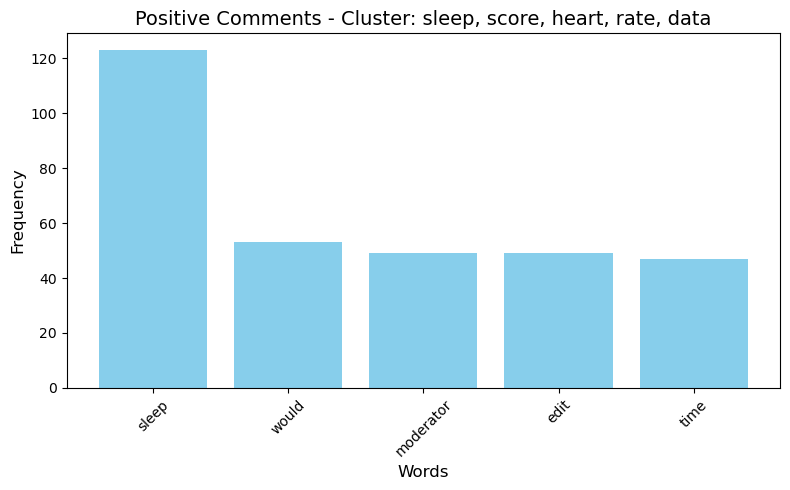

Positive Comments - Cluster: sleep, score, heart, rate, data
Top Words: [('sleep', 123), ('would', 53), ('moderator', 49), ('edit', 49), ('time', 47)]
Example Comments:
- When I had my Charge 5 and the first few weeks of having my Charge 6 the app would give me a sleep summary page with, Sleep Stages, Time in each stage, Oxygen levels and Bedtime and wakeup all on a handy page. Since a recent update I now seem to get a much more basic three tiles and I have to open each one and look through for all the information.
- With the updated sleep UI, I'm missing the amount in each segment. I can hover and see I was in REM from 3:43a - 4:09a, but I have to manually calculate that it was 26 minutes of REM sleep during that time. Previous UI would show that 26 mins. It would be great if the segment time was next to the actual time of night.   Moderator Edit: Clarified subject
- I used to be able to see the history of sleep hours and scores in a scrolling format, where EVERY DAY was listed on the

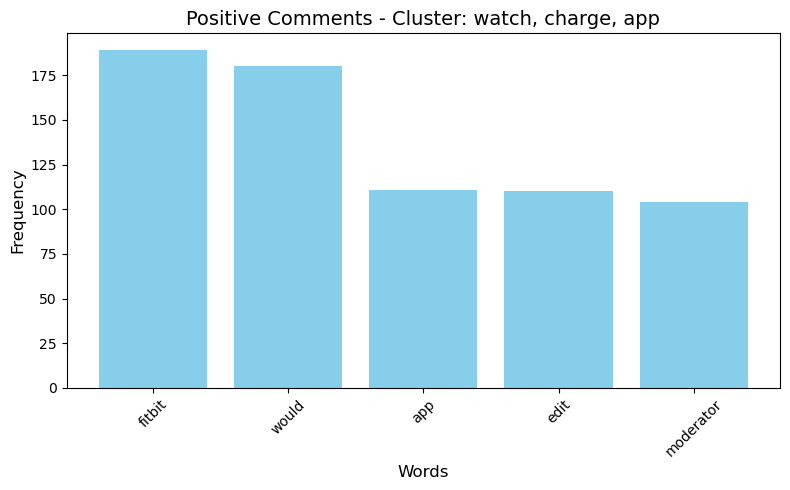

Positive Comments - Cluster: watch, charge, app
Top Words: [('fitbit', 189), ('would', 180), ('app', 111), ('edit', 110), ('moderator', 104)]
Example Comments:
- As an older user, my eyesight and hand eye coordination are poor. So, I prefer the website dashboard on my PC. That dashboard keeps directing us to the mobile app. Please assure you will continue maintaining both as I cannot rely solely on the mobile app. Please consider all of your customers when providing tools. Many thanks!
- The latest app upgrade removed the ability to edit activity information (again). This impacts app generated activities & manually added activities. Since dashboard access has also been removed, there is no way to change/update an activity start/end date/time, duration, distance, energy burn, name (standard or custom), & active/impact minutes/zones.
- Since the removal of the web based dashboard it is no longer possible to create Custom Workouts or to access most of the previously available database wor

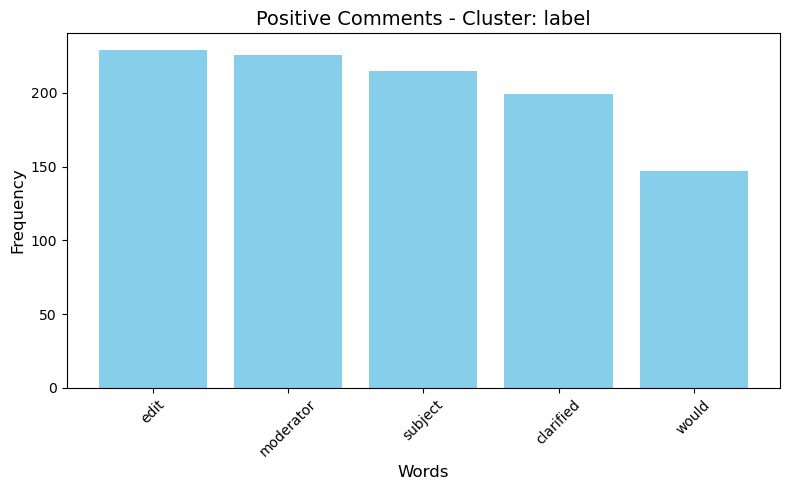

Positive Comments - Cluster: label
Top Words: [('edit', 229), ('moderator', 226), ('subject', 215), ('clarified', 199), ('would', 147)]
Example Comments:
- Dropping the online dashboard and forcing us only to the app will lose us useful features. In particular for me, the app does not allow custome meal creation, and it does not allow future calorie budgeting. I can post my planned food for the next day, but I can't actually see it on the app until the next day. Bring those features to the app.   Moderator Edit: Clarified subject
- Now that the Dashboard is eliminated, there is no way to add or edit favorite foods, which are listed as My Foods on the Android app. Eliminating the Dashboard is a loss in useability. Moderator edit: Clarified subject and updated label
- With the latest update to the fitbit app and the new interface, it seems the heart rate graph and ability to recategorize the type of exercise is gone. this was one of the main reasons I have and enjoy fitbit over the other

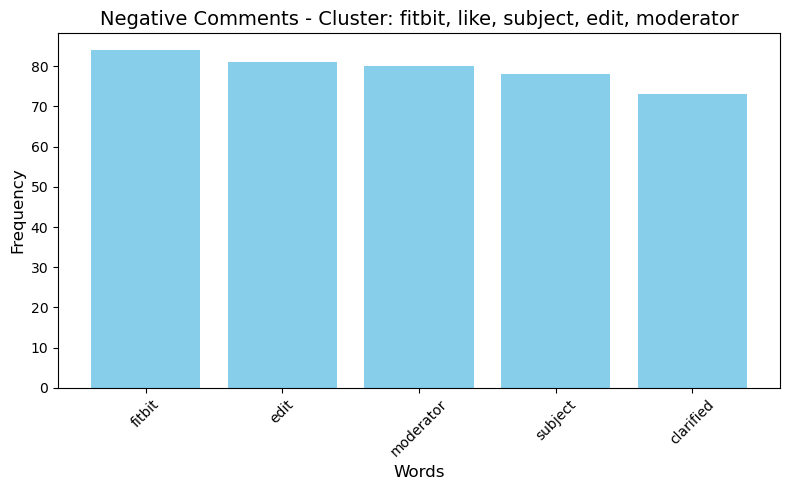

Negative Comments - Cluster: fitbit, like, subject, edit, moderator
Top Words: [('fitbit', 84), ('edit', 81), ('moderator', 80), ('subject', 78), ('clarified', 73)]
Example Comments:
- Given that the community has been asking for this for 10 years, and now you will no longer have access to "create a meal" via the web version of the dashboard, it's making it harder for me to a fan and supporter of Fitbit, and I've been a fan for more than a decade. Please have the app have at least the same features as the web version (e.g., create a meal), but since it doesn't already exist, add the feature for # of servings to make our lives easier please! Moderator Edit: Clarified subject and updated label
- Fitbit sometimes does not capture all the the sleep info for the night. On the dashboard one could manually add the time and it would self correct. No longer possible. As others have commented, I missed the dashboard the the ability to view on a larger screen. Moderator Edit: Clarified subject
- 

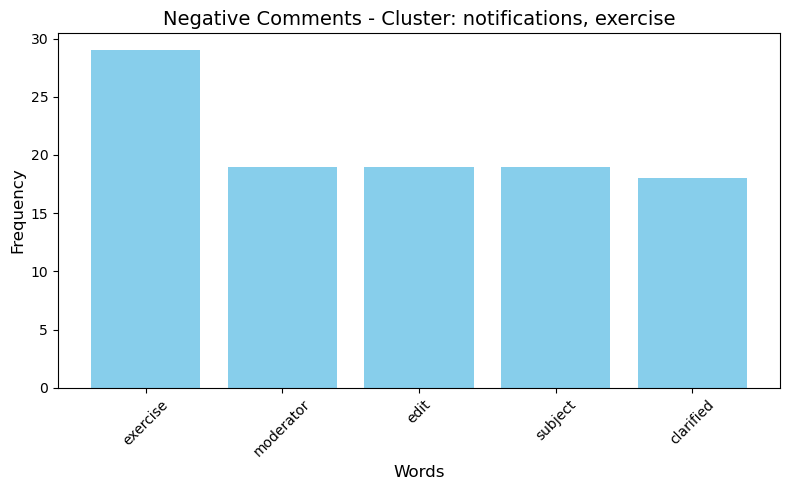

Negative Comments - Cluster: notifications, exercise
Top Words: [('exercise', 29), ('moderator', 19), ('edit', 19), ('subject', 19), ('clarified', 18)]
Example Comments:
- When you are walking and then you stop walking, Fitbit should not wait 15 min to send a reminder to end the exercise. At the very least, it should go on pause. What could possibly be the reason to leave such a gap? LizzyFitbit: PLEASE DO NOT CHANGE MY TITLE! Your "edits" make my posts not come up in searches.
- The device should track oxygen saturation during exercise, both for auto-detected exercise and manually tracked exercise activities.   Moderator Edit: Clarified subject and updated label
- Is anyone looking into this problem of exercise days disappearing? https://community.fitbit.com/t5/iOS-App/My-first-day-of-exercise-keeps-disappearing-from-the-app-and... Moderator edit: Clarified subject




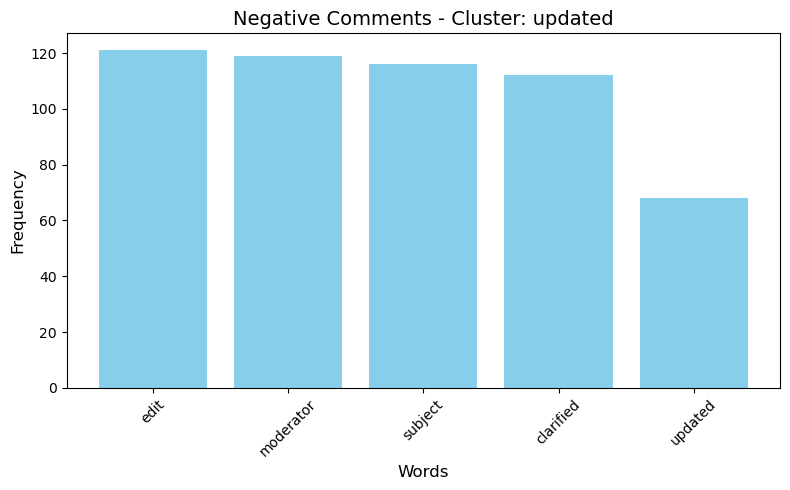

Negative Comments - Cluster: updated
Top Words: [('edit', 121), ('moderator', 119), ('subject', 116), ('clarified', 112), ('updated', 68)]
Example Comments:
- Along with many, I am very annoyed (to the point that I will not replace my Fitbit when it breaks but will go elsewhere) by the removal of the browser view. The IOS app only shows a run duration to the nearest minute, whereas the browser view showed to the second. Have you no idea what the basic requirements of a fitness tracker are?   Moderator Edit: Clarified subject
- Please can we have the actual, numerical estimate of calories remaining back on the app please? I have been following a sedentary calorie deficit plan since mid August and have lost over half a stone. I was very dependent on this metric to plan my food. Now I'm too scared to have a yoghurt in-case it tips my little pointer into the pink zone! Moderator Edit: Clarified subject
- Restore the ability to install 3rd party apps on the Versa 4 as was possible in previo

In [163]:
import matplotlib.pyplot as plt
import re
from collections import Counter

# Function to find comments containing specific words
def find_comments_with_words(comments, words, max_examples=3):
    examples = []
    for comment in comments:
        # Check if any of the top words appear in the comment
        if any(word in comment.lower() for word in words):
            examples.append(comment)
        if len(examples) == max_examples:  # Limit to max_examples
            break
    return examples

# Function to process clusters and get top words with examples
def process_clusters_with_examples(clustered_comments, stop_words, top_n=5):
    results = {}
    for cluster_name, comments in clustered_comments.items():
        # Combine and tokenize words
        combined_text = " ".join(comments)
        words = re.findall(r'\b\w+\b', combined_text.lower())
        filtered_words = [word for word in words if word not in stop_words]
        word_count = Counter(filtered_words)

        # Get top words
        top_words = word_count.most_common(top_n)

        # Find example comments
        top_word_list = [word for word, _ in top_words]
        examples = find_comments_with_words(comments, top_word_list)

        # Store results
        results[cluster_name] = {
            "top_words": top_words,
            "examples": examples
        }
    return results

# Define stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Process clusters
positive_results = process_clusters_with_examples(positive_clusters_named, stop_words, top_n=5)
negative_results = process_clusters_with_examples(negative_clusters_named, stop_words, top_n=5)

# Visualize and print results
def visualize_and_display_results(results, title):
    for cluster_name, data in results.items():
        # Unpack top words and counts
        top_words, examples = data["top_words"], data["examples"]
        labels, counts = zip(*top_words)

        # Bar Chart
        plt.figure(figsize=(8, 5))
        plt.bar(labels, counts, color='skyblue')
        plt.title(f"{title} - Cluster: {cluster_name}", fontsize=14)
        plt.xlabel("Words", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Print example comments
        print(f"{title} - Cluster: {cluster_name}")
        print("Top Words:", top_words)
        print("Example Comments:")
        for example in examples:
            print(f"- {example}")
        print("\n")

# Visualize and display results for positive and negative clusters
visualize_and_display_results(positive_results, "Positive Comments")
visualize_and_display_results(negative_results, "Negative Comments")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vinitbhanushali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


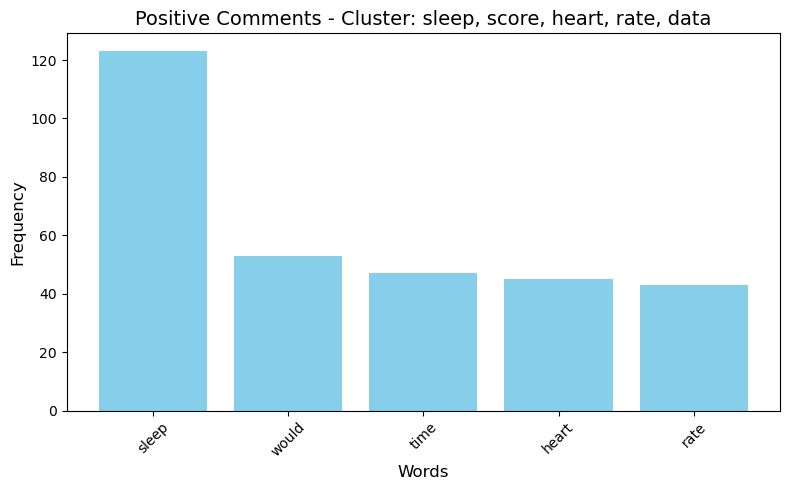

Positive Comments - Cluster: sleep, score, heart, rate, data
Top Words: [('sleep', 123), ('would', 53), ('time', 47), ('heart', 45), ('rate', 43)]
Example Comments:
- When I had my Charge 5 and the first few weeks of having my Charge 6 the app would give me a sleep summary page with, Sleep Stages, Time in each stage, Oxygen levels and Bedtime and wakeup all on a handy page. Since a recent update I now seem to get a much more basic three tiles and I have to open each one and look through for all the information.
- With the updated sleep UI, I'm missing the amount in each segment. I can hover and see I was in REM from 3:43a - 4:09a, but I have to manually calculate that it was 26 minutes of REM sleep during that time. Previous UI would show that 26 mins. It would be great if the segment time was next to the actual time of night.   Moderator Edit: Clarified subject
- I used to be able to see the history of sleep hours and scores in a scrolling format, where EVERY DAY was listed on the pag

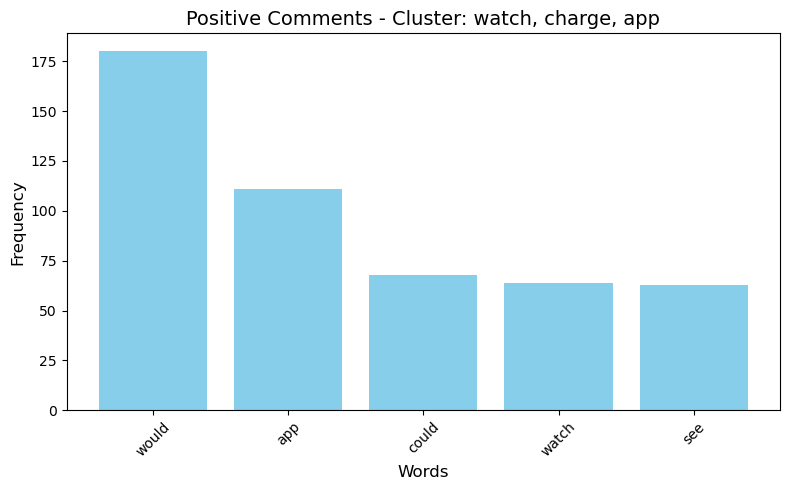

Positive Comments - Cluster: watch, charge, app
Top Words: [('would', 180), ('app', 111), ('could', 68), ('watch', 64), ('see', 63)]
Example Comments:
- As an older user, my eyesight and hand eye coordination are poor. So, I prefer the website dashboard on my PC. That dashboard keeps directing us to the mobile app. Please assure you will continue maintaining both as I cannot rely solely on the mobile app. Please consider all of your customers when providing tools. Many thanks!
- The latest app upgrade removed the ability to edit activity information (again). This impacts app generated activities & manually added activities. Since dashboard access has also been removed, there is no way to change/update an activity start/end date/time, duration, distance, energy burn, name (standard or custom), & active/impact minutes/zones.
- Since the removal of the web based dashboard it is no longer possible to create Custom Workouts or to access most of the previously available database workouts. Pl

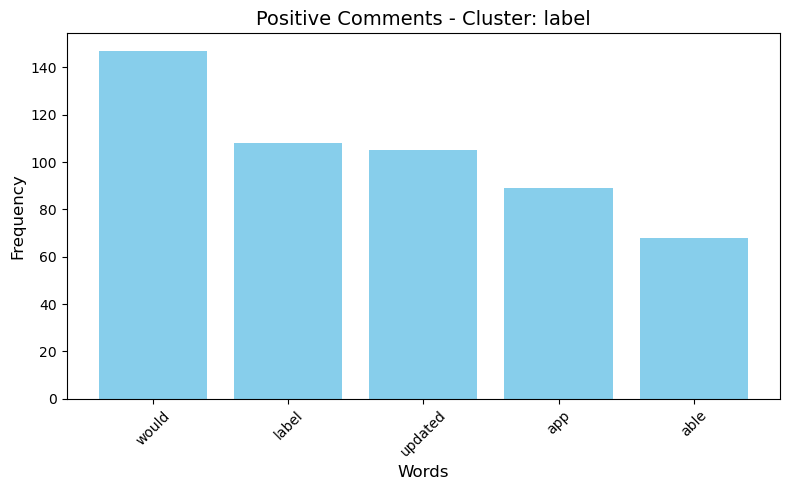

Positive Comments - Cluster: label
Top Words: [('would', 147), ('label', 108), ('updated', 105), ('app', 89), ('able', 68)]
Example Comments:
- Dropping the online dashboard and forcing us only to the app will lose us useful features. In particular for me, the app does not allow custome meal creation, and it does not allow future calorie budgeting. I can post my planned food for the next day, but I can't actually see it on the app until the next day. Bring those features to the app.   Moderator Edit: Clarified subject
- Now that the Dashboard is eliminated, there is no way to add or edit favorite foods, which are listed as My Foods on the Android app. Eliminating the Dashboard is a loss in useability. Moderator edit: Clarified subject and updated label
- With the latest update to the fitbit app and the new interface, it seems the heart rate graph and ability to recategorize the type of exercise is gone. this was one of the main reasons I have and enjoy fitbit over the other trackers. P

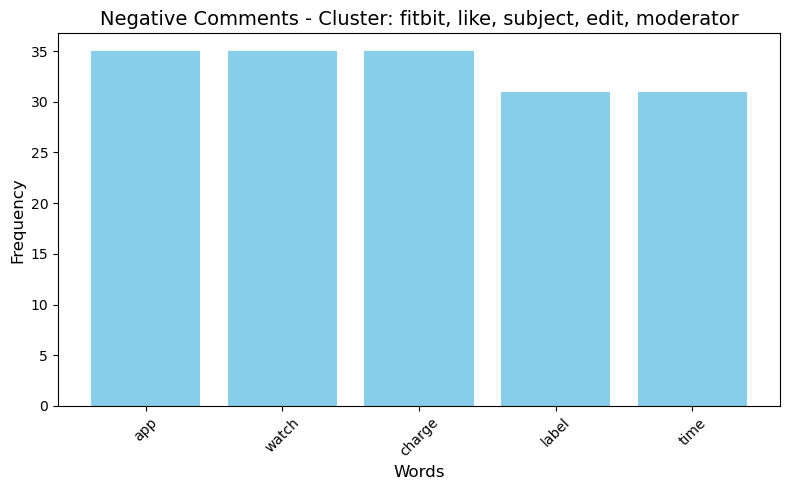

Negative Comments - Cluster: fitbit, like, subject, edit, moderator
Top Words: [('app', 35), ('watch', 35), ('charge', 35), ('label', 31), ('time', 31)]
Example Comments:
- Given that the community has been asking for this for 10 years, and now you will no longer have access to "create a meal" via the web version of the dashboard, it's making it harder for me to a fan and supporter of Fitbit, and I've been a fan for more than a decade. Please have the app have at least the same features as the web version (e.g., create a meal), but since it doesn't already exist, add the feature for # of servings to make our lives easier please! Moderator Edit: Clarified subject and updated label
- Fitbit sometimes does not capture all the the sleep info for the night. On the dashboard one could manually add the time and it would self correct. No longer possible. As others have commented, I missed the dashboard the the ability to view on a larger screen. Moderator Edit: Clarified subject
- I always loo

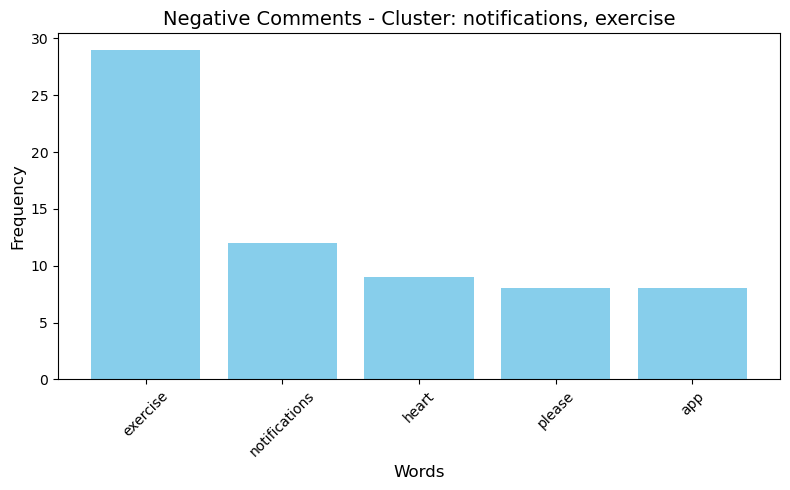

Negative Comments - Cluster: notifications, exercise
Top Words: [('exercise', 29), ('notifications', 12), ('heart', 9), ('please', 8), ('app', 8)]
Example Comments:
- When you are walking and then you stop walking, Fitbit should not wait 15 min to send a reminder to end the exercise. At the very least, it should go on pause. What could possibly be the reason to leave such a gap? LizzyFitbit: PLEASE DO NOT CHANGE MY TITLE! Your "edits" make my posts not come up in searches.
- The device should track oxygen saturation during exercise, both for auto-detected exercise and manually tracked exercise activities.   Moderator Edit: Clarified subject and updated label
- Is anyone looking into this problem of exercise days disappearing? https://community.fitbit.com/t5/iOS-App/My-first-day-of-exercise-keeps-disappearing-from-the-app-and... Moderator edit: Clarified subject




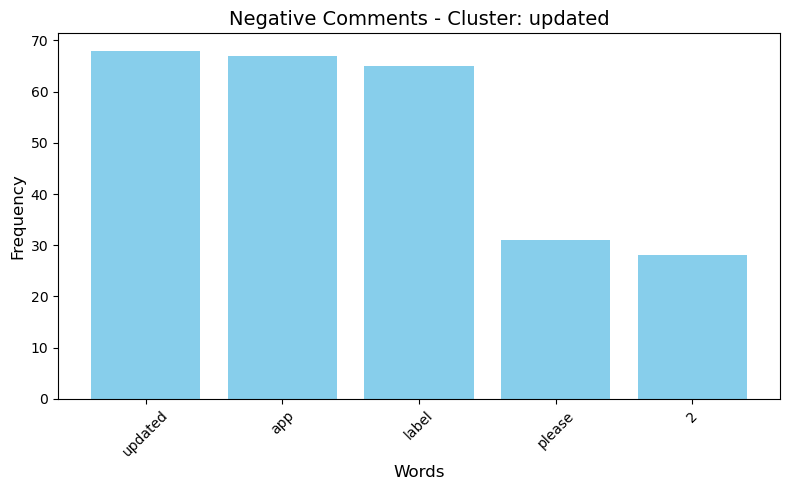

Negative Comments - Cluster: updated
Top Words: [('updated', 68), ('app', 67), ('label', 65), ('please', 31), ('2', 28)]
Example Comments:
- Along with many, I am very annoyed (to the point that I will not replace my Fitbit when it breaks but will go elsewhere) by the removal of the browser view. The IOS app only shows a run duration to the nearest minute, whereas the browser view showed to the second. Have you no idea what the basic requirements of a fitness tracker are?   Moderator Edit: Clarified subject
- Please can we have the actual, numerical estimate of calories remaining back on the app please? I have been following a sedentary calorie deficit plan since mid August and have lost over half a stone. I was very dependent on this metric to plan my food. Now I'm too scared to have a yoghurt in-case it tips my little pointer into the pink zone! Moderator Edit: Clarified subject
- Restore the ability to install 3rd party apps on the Versa 4 as was possible in previous versions of the

In [165]:
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

# Function to find comments containing specific words
def find_comments_with_words(comments, words, max_examples=3):
    examples = []
    for comment in comments:
        # Check if any of the top words appear in the comment
        if any(word in comment.lower() for word in words):
            examples.append(comment)
        if len(examples) == max_examples:  # Limit to max_examples
            break
    return examples

# Function to process clusters and get top words with examples
def process_clusters_with_examples(clustered_comments, stop_words, top_n=5):
    results = {}
    for cluster_name, comments in clustered_comments.items():
        # Combine and tokenize words
        combined_text = " ".join(comments)
        words = re.findall(r'\b\w+\b', combined_text.lower())
        filtered_words = [word for word in words if word not in stop_words]
        word_count = Counter(filtered_words)

        # Get top words
        top_words = word_count.most_common(top_n)

        # Find example comments
        top_word_list = [word for word, _ in top_words]
        examples = find_comments_with_words(comments, top_word_list)

        # Store results
        results[cluster_name] = {
            "top_words": top_words,
            "examples": examples
        }
    return results

# Define stop words
stop_words = set(stopwords.words('english'))
# Add custom stop words
custom_stop_words = {'moderator', 'subject', 'is', 'the', 'in', 'fitbit', 'edit', 'clarified', 'and', 'to', 'it', 'like'}
stop_words.update(custom_stop_words)

# Process clusters
positive_results = process_clusters_with_examples(positive_clusters_named, stop_words, top_n=5)
negative_results = process_clusters_with_examples(negative_clusters_named, stop_words, top_n=5)

# Visualize and print results
def visualize_and_display_results(results, title):
    for cluster_name, data in results.items():
        # Unpack top words and counts
        top_words, examples = data["top_words"], data["examples"]
        labels, counts = zip(*top_words)

        # Bar Chart
        plt.figure(figsize=(8, 5))
        plt.bar(labels, counts, color='skyblue')
        plt.title(f"{title} - Cluster: {cluster_name}", fontsize=14)
        plt.xlabel("Words", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Print example comments
        print(f"{title} - Cluster: {cluster_name}")
        print("Top Words:", top_words)
        print("Example Comments:")
        for example in examples:
            print(f"- {example}")
        print("\n")

# Visualize and display results for positive and negative clusters
visualize_and_display_results(positive_results, "Positive Comments")
visualize_and_display_results(negative_results, "Negative Comments")


In [183]:
from sklearn.metrics import silhouette_score

def cluster_and_name_comments(comments, vectorizer, num_clusters=3, visualize=True):
    # Vectorize comments using TF-IDF
    X = vectorizer.fit_transform(comments)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg}")

    # Visualize clusters using PCA
    if visualize:
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(X.toarray())
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
        plt.title('Clusters Visualization')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

    # Group comments by cluster
    clustered_comments = {i: [] for i in range(num_clusters)}
    for comment, label in zip(comments, labels):
        clustered_comments[label].append(comment)

    # Extract keywords and name the clusters
    named_clusters = {}
    for cluster_id, cluster_comments in clustered_comments.items():
        keywords = extract_keywords(cluster_comments, vectorizer)
        cluster_name = ", ".join(keywords)  # Create a name from the top keywords
        named_clusters[cluster_name] = cluster_comments

    return named_clusters


Silhouette Score: 0.010715378560330252


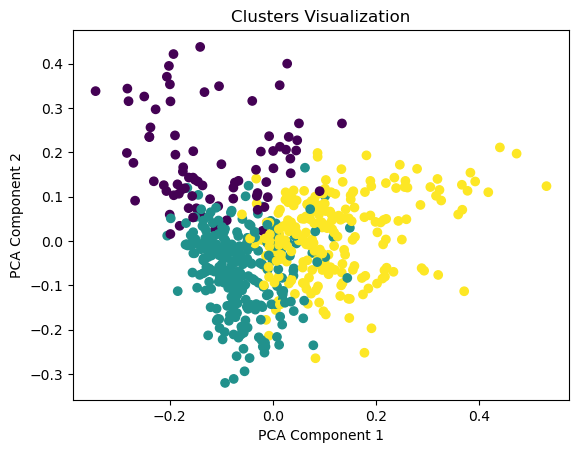

Silhouette Score: 0.009614855696817505


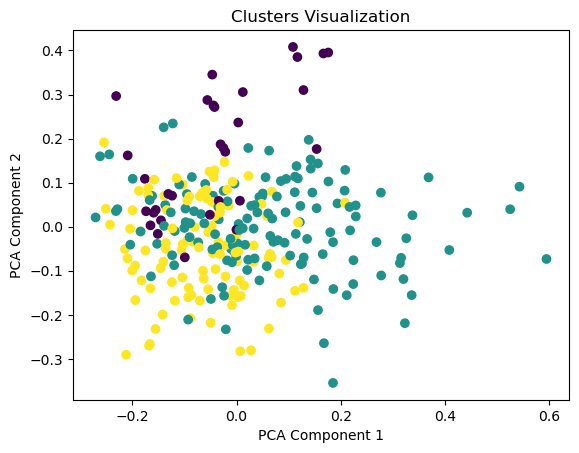

In [186]:
# Vectorizer for TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)

# Cluster positive comments and name clusters
positive_clusters_named = cluster_and_name_comments(positive_comments, vectorizer, num_clusters=3)

# Cluster negative comments and name clusters
negative_clusters_named = cluster_and_name_comments(negative_comments, vectorizer, num_clusters=3)


In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data (list of comments)
comments = ["This is a positive comment", "This is a negative comment", "I love this", "I hate this", ...]

# Convert text data to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df)  # X is now your feature matrix


In [ ]:
# Function to extract top keywords for a cluster
def extract_keywords(texts, vectorizer, top_n=5):
    # Transform texts using the vectorizer
    X = vectorizer.transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    # Sum TF-IDF scores for each word
    tfidf_scores = X.sum(axis=0).A1
    keywords = [(feature_names[i], tfidf_scores[i]) for i in range(len(feature_names))]
    # Sort by score and return top keywords
    sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return [keyword for keyword, score in sorted_keywords[:top_n]]

# Function to preprocess, cluster, and name comments
def cluster_and_name_comments(comments, vectorizer, num_clusters=3, visualize=True):
    # Vectorize comments using TF-IDF
    X = vectorizer.fit_transform(comments)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Visualize clusters using PCA
    if visualize:
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(X.toarray())
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
        plt.title('Clusters Visualization')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()

    # Group comments by cluster
    clustered_comments = {i: [] for i in range(num_clusters)}
    for comment, label in zip(comments, labels):
        clustered_comments[label].append(comment)

    # Extract keywords and name the clusters
    named_clusters = {}
    for cluster_id, cluster_comments in clustered_comments.items():
        keywords = extract_keywords(cluster_comments, vectorizer)
        cluster_name = ", ".join(keywords)  # Create a name from the top keywords
        named_clusters[cluster_name] = cluster_comments

    return named_clusters

# Vectorizer for TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)

# Cluster positive comments and name clusters
positive_clusters_named = cluster_and_name_comments(positive_comments, vectorizer, num_clusters=3)

# Cluster negative comments and name clusters
negative_clusters_named = cluster_and_name_comments(negative_comments, vectorizer, num_clusters=3)

# Ensure no overlap in words between positive and negative clusters
positive_keywords = set()
negative_keywords = set()

# Collect all keywords from both positive and negative clusters
for cluster_name in positive_clusters_named:
    positive_keywords.update(cluster_name.split(", "))
for cluster_name in negative_clusters_named:
    negative_keywords.update(cluster_name.split(", "))

# Remove common words
common_keywords = positive_keywords.intersection(negative_keywords)
for cluster_name in positive_clusters_named.copy():
    keywords = set(cluster_name.split(", "))
    if keywords & common_keywords:
        unique_keywords = keywords - common_keywords
        if unique_keywords:
            new_name = ", ".join(unique_keywords)
            positive_clusters_named[new_name] = positive_clusters_named.pop(cluster_name)

for cluster_name in negative_clusters_named.copy():
    keywords = set(cluster_name.split(", "))
    if keywords & common_keywords:
        unique_keywords = keywords - common_keywords
        if unique_keywords:
            new_name = ", ".join(unique_keywords)
            negative_clusters_named[new_name] = negative_clusters_named.pop(cluster_name)

# Save clusters with descriptive names to JSON files
with open('positive_clusters_named.json', 'w', encoding='utf-8') as f:
    json.dump(positive_clusters_named, f, ensure_ascii=False, indent=4)

with open('negative_clusters_named.json', 'w', encoding='utf-8') as f:
    json.dump(negative_clusters_named, f, ensure_ascii=False, indent=4)


Silhouette Score: 0.004228978940039073


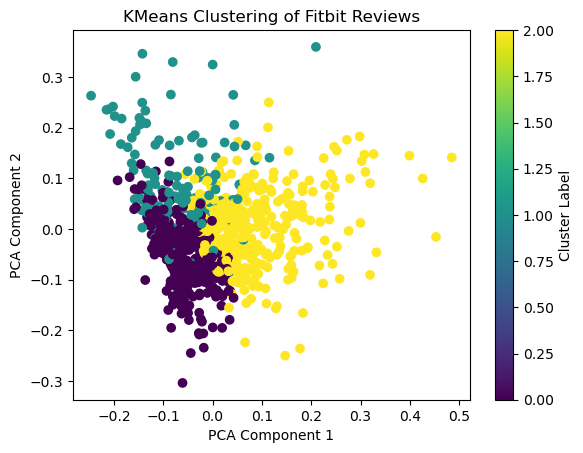

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Step 1: Vectorize the comments using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Combine positive and negative comments if you want to cluster them together
comments = positive_comments + negative_comments

# Fit and transform the comments into a matrix of TF-IDF features
X = vectorizer.fit_transform(comments)

# Step 2: Apply KMeans clustering
n_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Step 3: Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Step 4: (Optional) Use PCA to reduce the dimensionality and visualize clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())  # X.toarray() is used to convert sparse matrix to dense array

# Plot the results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', label='Clusters')
plt.title('KMeans Clustering of Fitbit Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
